In [1]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

import string
import os
import glob
from PIL import Image
from time import time

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras import Input, layers
from keras import optimizers
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing import sequence
from keras.preprocessing import image
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Embedding, Dense, Activation, Flatten, Reshape, Dropout
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from tensorflow.keras.utils import to_categorical
# small library for seeing the progress of loops.
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [38]:
image_dataset_path = '/content/sample_data/images'
caption_dataset_path = '/content/sample_data/caption/sample.token.txt'

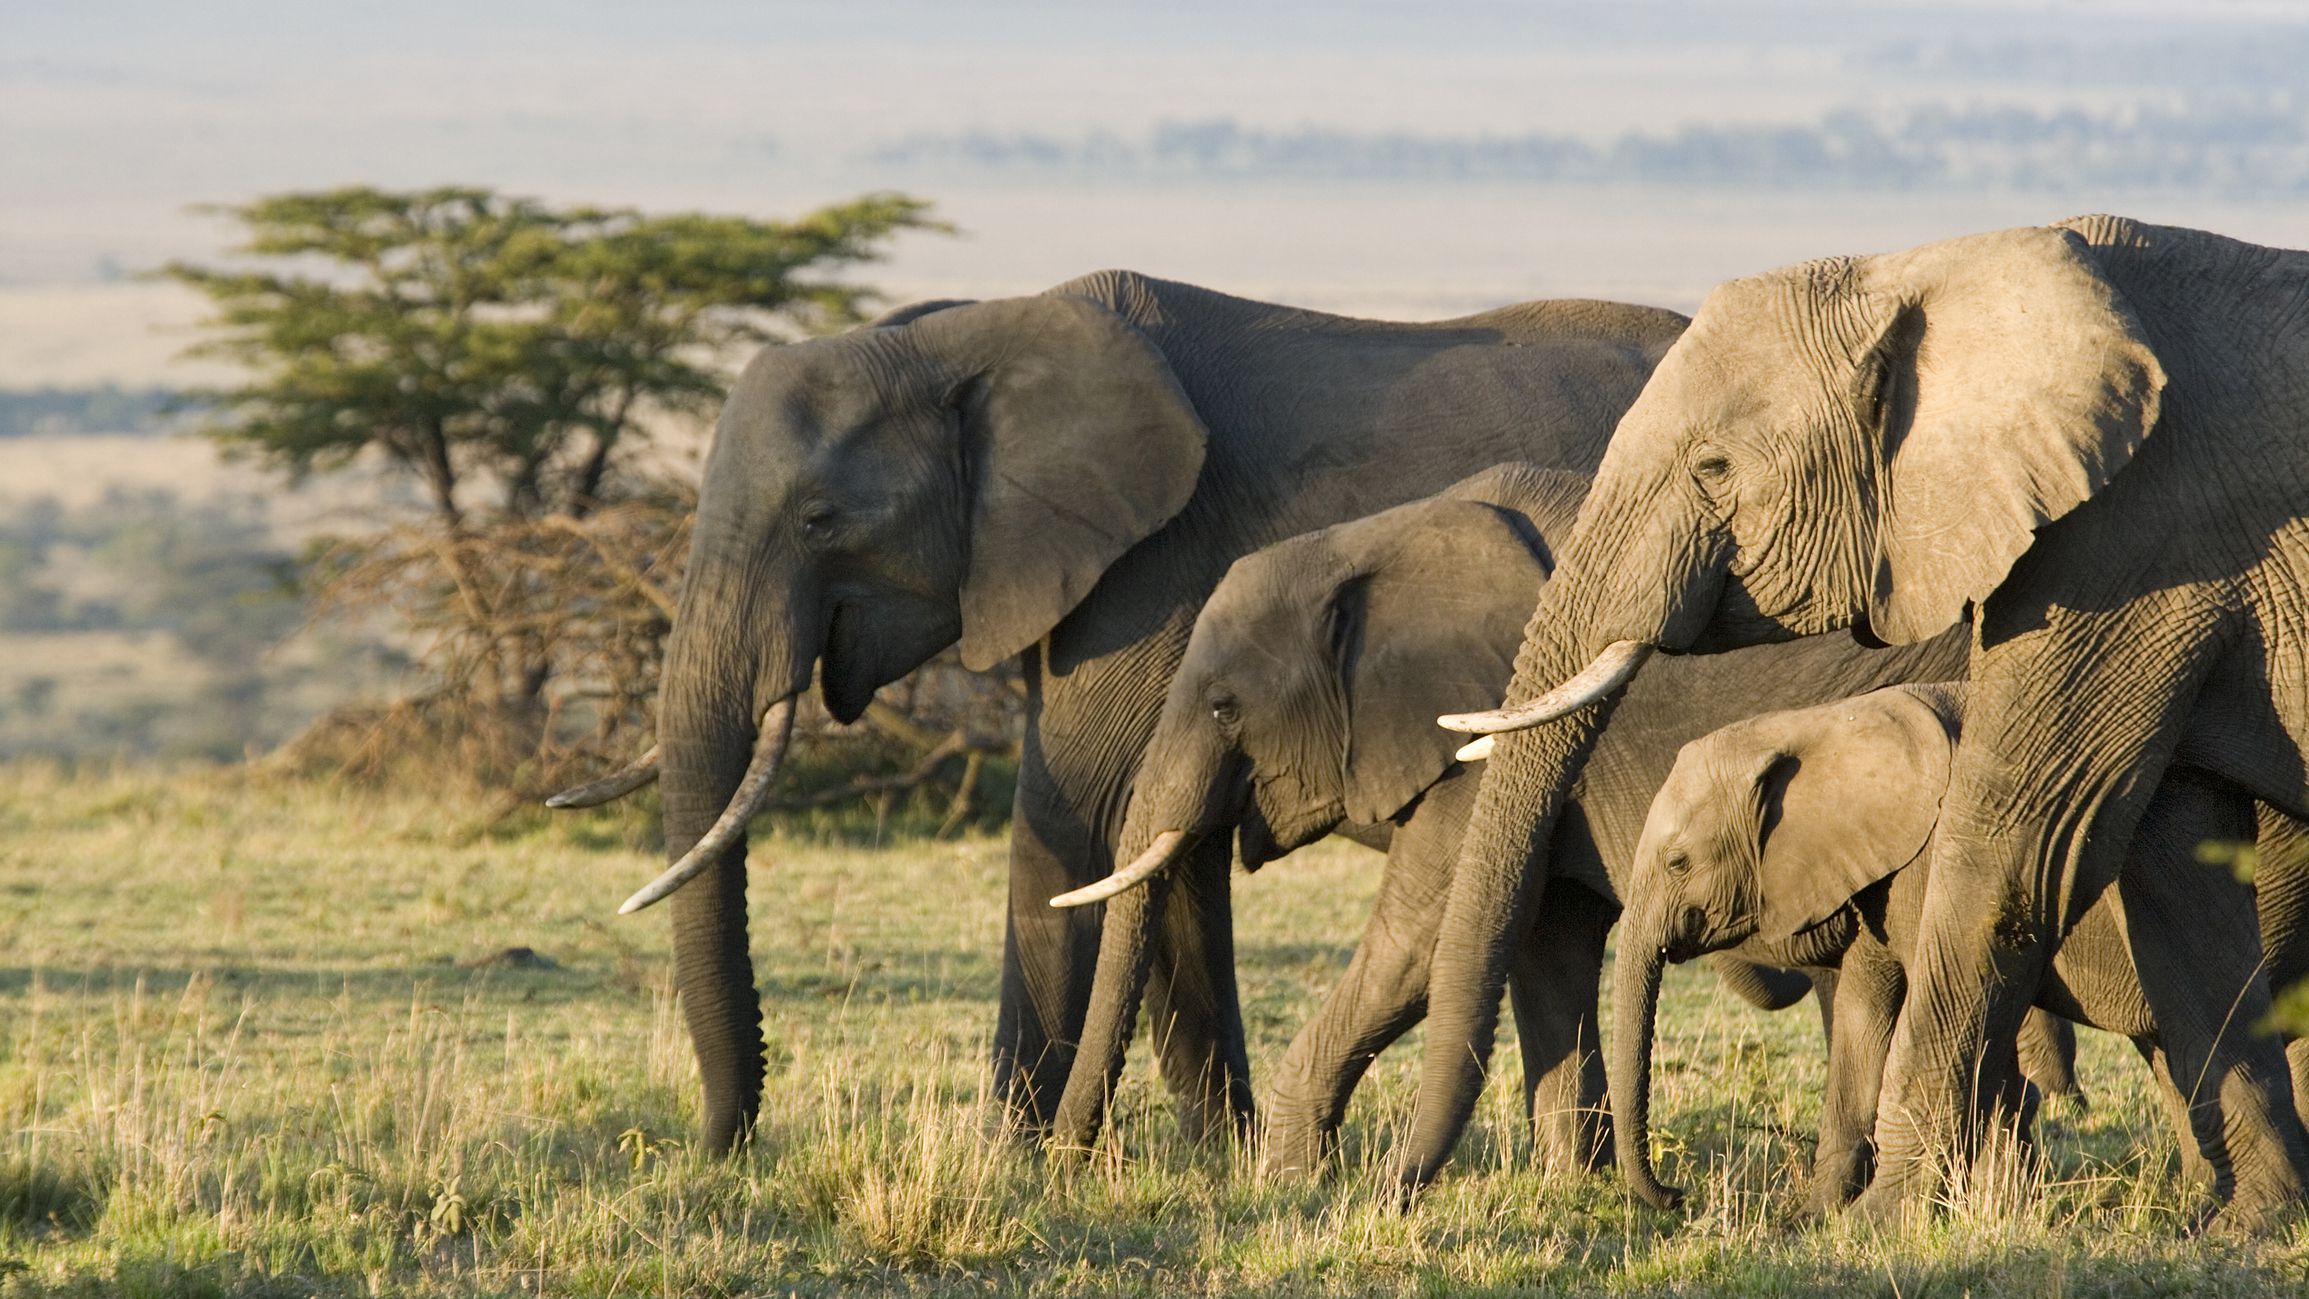

In [3]:
from IPython.display import Image
Image('/content/sample_data/images/img03.jpg')

# Caption Processing

In [39]:
# load the caption file & read it
def load_caption_file(caption_dataset_path):
    
    # dictionary to store captions
    captions_dict = {}
    
    # iterate through the file
    for caption in open('/content/sample_data/caption/sample.token.txt'):        
        # Splitting the name of image file and image caption
        tokens = caption.split(' ')
        caption_id  = tokens[0].split('.')[0]
        caption_text= tokens[1:]
        # convert it into lower case
        caption_text = [token.lower() for token in caption_text]
        caption_text = ' '.join(caption_text)
        # save it in the captions dictionary
        if caption_id not in captions_dict:
            captions_dict[caption_id] = caption_text
        
    return captions_dict

# call the function
captions_dict = load_caption_file(caption_dataset_path)

# Preprocessing of the captions

In [40]:
print('"' + list(captions_dict.keys())[0] + '"' + ' : ' + captions_dict[list(captions_dict.keys())[0]])

"img01" : boy in black jacket.



# converting dictionary into List

In [33]:
caption_image_list = list(captions_dict.items())

# Splitting the data into training, validation and test data

In [34]:
train_validate_images = caption_image_list[0:13] 

In [36]:
test_images = caption_image_list[13:15]
test_images

[('img14', 'of india.\n'), ('img15', 'of india.\n')]

# Extracting features of images

extract_features function extracts the important features out of the images passed using Xception model.

In [60]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions


def extract_features1(directory, image_keys):
    # load the model    
    #model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')
    model = Xception(include_top = False, pooling='avg')
    # model summary
    print(model.summary())
    
    # extract features from each photo
    features = dict()
    
    for name in image_keys:
        
        # load an image from file
        filename = directory + '/' + name + '.jpg'
        
        # load the image and convert it into size accepted by model
        image = load_img(filename, target_size=(224, 224))
        
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        
        # reshape data for the model.
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        
        # prepare the image for the ResNet model
        image = preprocess_input(image)
        
        # get features
        feature = model.predict(image, verbose=0)
        
        # get image id
        image_id = name.split('.')[0]
        
        # store feature
        features[image_id] = feature
         

    return features

# Feature Extraction

In [53]:
type(image_dataset_path)

str

In [54]:
type(train_validate_images)

list

In [59]:
def checkType(a_list): # JUST CHECHING THE TYPE OF INTERNAL ELEMENTS OF train_validate_images
    for element in a_list:
        if isinstance(element, int):
            print("It's an Integer")
        if isinstance(element, str):
            print("It's an string")
        if isinstance(element, float):
            print("It's an floating number")

checkType(train_validate_images)

In [61]:
train_validate_features1 = extract_features1(image_dataset_path, train_validate_images)

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

TypeError: ignored